In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_colwidth', 0)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

In [5]:
dir='/work/projects/ecosystem_biology/archaea/coevolution/analysis/mt_analysis/mapping_processed/uniq'
output='/work/projects/ecosystem_biology/archaea/coevolution/analysis/mt_analysis/mg_mt_matches/tables_per_sample_reduced/uniq'

for filename in os.listdir(dir):
    print(filename)
    
    diamond_output = pd.read_csv(dir+'/'+filename, 
                                 sep='\t', 
                                 header=None, 
                                 names=['gene_mg', 'gene_mt', 'identity', 'bitscore'])
    
    gene_depth = pd.read_csv('/mnt/isilon/projects/ecosystem_biology/MiBiPa/IMP/'+ filename.split('_matches.tsv')[0] +'/run1/Analysis/mt.gene_depth.avg',
                             sep='\t', 
                             header=None, 
                             names=['gene_mt', 'coverage'])
    
    combined_mg_mt = diamond_output.merge(gene_depth)
    
    combined_mg_mt = combined_mg_mt\
    .sort_values(['gene_mt', 'identity', 'bitscore'], ascending=False)\
    .drop_duplicates('gene_mt', keep='first')
    
    result = combined_mg_mt[(combined_mg_mt.identity >=75) 
                   & (combined_mg_mt.coverage != 0)]\
    .sort_values(['gene_mg', 'identity', 'bitscore'], 
                 ascending=[True, False, False])
    
    result.to_csv(output+'/'+filename.split('_matches.tsv')[0]+'.csv',
                 sep='\t', index=False)
    
    

Batch1_1_matches.tsv
1228_14_matches.tsv
1229_16_matches.tsv
1228_3_matches.tsv
1230_15_matches.tsv
1229_13_matches.tsv
1233_7_matches.tsv
1229_7_matches.tsv
1236_10_matches.tsv
Man14122018_2_matches.tsv
1226_4_matches.tsv
1229_12_matches.tsv
1230_10_matches.tsv
1237_19_matches.tsv
Batch3_12_matches.tsv
1235_11_matches.tsv
1236_3_matches.tsv
1231_15_matches.tsv
1233_15_matches.tsv
1236_12_matches.tsv
1228_11_matches.tsv
1237_18_matches.tsv
1228_18_matches.tsv
1231_18_matches.tsv
1237_3_matches.tsv
1236_16_matches.tsv
1229_17_matches.tsv
1233_9_matches.tsv
1233_13_matches.tsv
1228_7_matches.tsv
1228_1_matches.tsv
1228_4_matches.tsv
1235_4_matches.tsv
1228_2_matches.tsv
1234_15_matches.tsv
1231_10_matches.tsv
Batch2_10_matches.tsv
1226_7_matches.tsv
1229_15_matches.tsv
1228_16_matches.tsv
Batch2_1_matches.tsv
1233_10_matches.tsv
1236_15_matches.tsv
Batch2_4_matches.tsv
1233_20_matches.tsv
Batch3_20_matches.tsv
1229_11_matches.tsv
1226_5_matches.tsv
1237_17_matches.tsv
1236_6_matches.tsv


In [6]:
result

gene_mg          gene_mt  identity  bitscore  coverage
0  u1      MGHPDBIJ_101164  91.8      363.0     0.946032
3  u2      MGHPDBIJ_600800  98.1      107.0     4.518270
7  u3      MGHPDBIJ_111456  85.0      132.0     1.006670

### Check relative abundance of MG genes in MT data per condition

In [14]:
ctrl = pd.read_csv('analysis/intermediate_results/counts_ctrl_uniq.tsv', sep='\t')
park = pd.read_csv('analysis/intermediate_results/counts_park_uniq.tsv', sep='\t') 
#                    header=None, names=['prot_name', 'bla', 'pd_relative_abundance'])
rbd =pd.read_csv('analysis/intermediate_results/counts_rbd_uniq.tsv', sep='\t')
#                  header=None, names=['prot_name', 'bla', 'rbd_relative_abundance'])

In [15]:
ctrl['prot_name'] = ctrl['prot_name'].str.strip()
park['prot_name'] = park['prot_name'].str.strip()
rbd['prot_name'] = rbd['prot_name'].str.strip()

In [16]:
park

prot_name  pd_count  pd_relative_abundance
0   u2        19        0.404255             
1   u1        15        0.319149             
2   u10       14        0.297872             
3   u4        11        0.234043             
4   u18       7         0.148936             
5   u6        4         0.085106             
6   u3        4         0.085106             
7   u9        2         0.042553             
8   u5        1         0.021277             
9   u27       1         0.021277             
10  u19       1         0.021277             
11  u12       1         0.021277             
12  u11       1         0.021277

In [17]:
ctrl = ctrl [['prot_name', 'ctrl_relative_abundance']]
park = park[['prot_name', 'pd_relative_abundance']]
rbd = rbd[['prot_name', 'rbd_relative_abundance']]

In [18]:
output = pd.merge(pd.merge(ctrl,park,on='prot_name'),rbd,on='prot_name')
output

prot_name  ctrl_relative_abundance  pd_relative_abundance  \
0  u10       0.265306                 0.297872                
1  u2        0.244898                 0.404255                
2  u1        0.224490                 0.319149                
3  u18       0.183673                 0.148936                
4  u4        0.122449                 0.234043                
5  u3        0.102041                 0.085106                
6  u6        0.020408                 0.085106                
7  u27       0.020408                 0.021277                
8  u11       0.020408                 0.021277                

   rbd_relative_abundance  
0  0.370370                
1  0.407407                
2  0.333333                
3  0.370370                
4  0.259259                
5  0.074074                
6  0.074074                
7  0.037037                
8  0.111111

<BarContainer object of 9 artists>

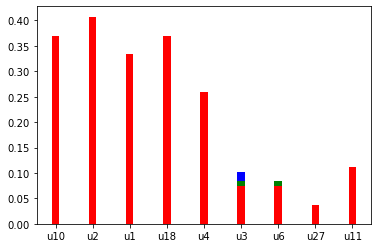

In [19]:
ax = plt.subplot(111)

ax.bar(output['prot_name'], output['ctrl_relative_abundance'], width=0.2, color='b', align='center')
ax.bar(output['prot_name'], output['pd_relative_abundance'], width=0.2, color='g', align='center')
ax.bar(output['prot_name'], output['rbd_relative_abundance'], width=0.2, color='r', align='center')

In [20]:
len(output)

9

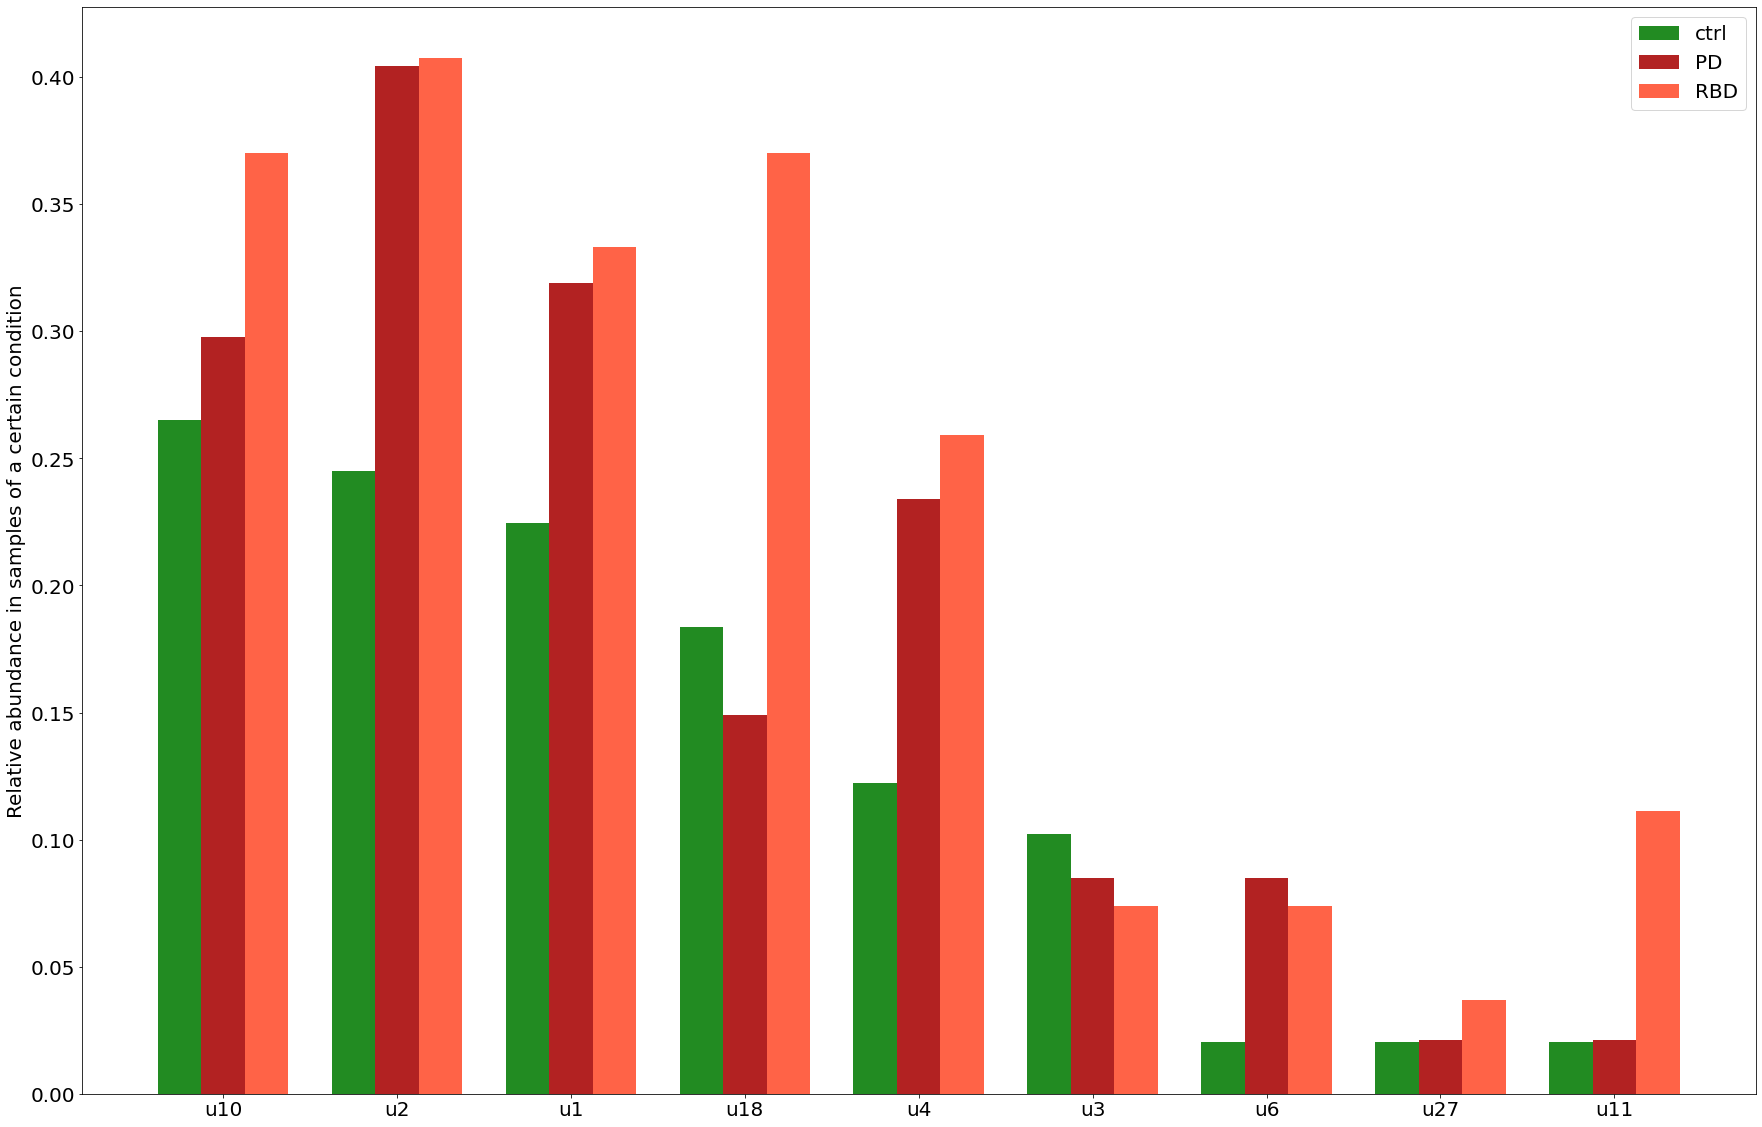

In [21]:
N = len(output)
ind = np.arange(N)  # the x locations for the groups
width = 0.25      # the width of the bars

fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(111)


yvals = output['ctrl_relative_abundance']
rects1 = ax.bar(ind, yvals, width, color='forestgreen')
zvals = output['pd_relative_abundance']
rects2 = ax.bar(ind+width, zvals, width, color='firebrick')
kvals = output['rbd_relative_abundance']
rects3 = ax.bar(ind+width*2, kvals, width, color='tomato')

ax.set_ylabel('Relative abundance in samples of a certain condition', fontsize = 20)
ax.set_xticks(ind+width)
ax.set_xticklabels(output.prot_name)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

ax.legend( (rects1[0], rects2[0], rects3[0]), ('ctrl', 'PD', 'RBD'), fontsize = 20 )

# def autolabel(rects):
#     for rect in rects:
#         h = rect.get_height()
#         ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
#                 ha='center', va='bottom')

# autolabel(rects1)
# autolabel(rects2)
# autolabel(rects3)

plt.show()